this is for titanic eda.

In [51]:
# load the library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [52]:
# fetch the data
trn_data = pd.read_csv("train.csv")
tst_data = pd.read_csv('test.csv')


In [53]:
# look data
trn_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
# check the dataset shape and description
trn_data.shape
# in this dataset there are 891 rows and 12 column or feature are available

(891, 12)

In [55]:
tst_data.shape

(418, 11)

In [56]:
trn_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
# check all features datatypes
trn_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<AxesSubplot:>

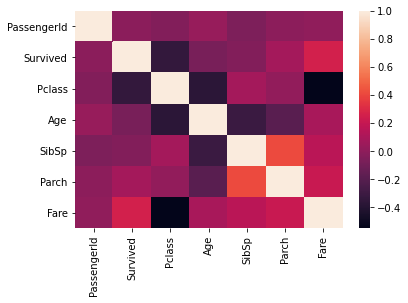

In [58]:
# find the corrrelation of feature
sns.heatmap(trn_data.corr())

<AxesSubplot:>

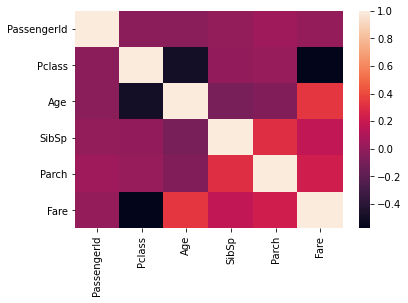

In [59]:
sns.heatmap(tst_data.corr())

 lets understand the correlation by its color and values if corrrelation is high then that feature is not for use model because similarity is more 

In [60]:
# print all correlation values
trn_data.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

## in above cell correlation is represented , so it very good because all features are good with minimum correlation. 

In [61]:
# missing value in %
100*tst_data.isnull().sum()/len(tst_data)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [62]:
# find the missing value %
100*trn_data.isnull().sum()/len(trn_data)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

in the above cell missing value in cabin is greter then 50 % fill it by its mean.

In [63]:
trn_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [64]:
# create feature and target with interger column
y = trn_data['Survived']
feature = ['Pclass','Sex','Age','Parch','SibSp','Fare']
X = pd.get_dummies(trn_data[feature])
X_test = pd.get_dummies(tst_data[feature])

In [65]:
X = X.drop(['Sex_male'], axis=1)
X = X.fillna({'Age':30})
X

,Pclass,Age,Parch,SibSp,Fare,Sex_female
0,3,22.0,0,1,7.2500,0
1,1,38.0,0,1,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,0,1,53.1000,1
4,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0
887,1,19.0,0,0,30.0000,1
888,3,30.0,2,1,23.4500,1
889,1,26.0,0,0,30.0000,0


In [66]:
X.isnull().sum()

Pclass        0
Age           0
Parch         0
SibSp         0
Fare          0
Sex_female    0
dtype: int64

In [67]:
#tst_data.isnull().sum()
#tst_data.describe()
#X_test=tst_data.fillna({'Fare':0.39})

In [68]:
X_test = X_test.drop(['Sex_male'], axis=1)
#X_test['Age'].fillna(30)
X_test = X_test.fillna({'Age':30,'Fare':0.39})

In [69]:
X_test.isnull().sum()

Pclass        0
Age           0
Parch         0
SibSp         0
Fare          0
Sex_female    0
dtype: int64

In [70]:
# create model
model = RandomForestClassifier(n_estimators=100,max_depth=6,random_state=1)
model.fit(X,y)
pred=model.predict(X_test)

In [71]:
# load gender submission
val_data = val_data['Survived']

In [72]:
score = accuracy_score(val_data,pred)

In [73]:
score

0.916267942583732

# Thank u